In [1]:
import glob
import pandas
import matplotlib.pyplot as plt
import seaborn
import json
import numpy as np
import os

import mplhep as hep
hep.style.use("CMS")

In [3]:
losses = {
    "ParticleTransformer": {},
    "OmniParT": {},
    "OmniFeedforward": {},
    "LorentzNet": {},
    "SimpleDNN": {},
}

losses2 = {
    "OmniDeepSet": {},
}

for path in sorted(glob.glob("../training-outputs/240812_3vars/*/*/*/history.json")):
    spl = path.split("/")
    model = spl[-2]
    train_size = float(spl[-4].split("_")[1])
    print(model, train_size)

    losses[model][train_size] = json.load(open(path))

for path in sorted(glob.glob("../training-outputs/240819_omnideepset/*/*/*/history.json")):
    spl = path.split("/")
    model = spl[-2]
    train_size = float(spl[-4].split("_")[1])
    print(model, train_size)

    losses2[model][train_size] = json.load(open(path))

LorentzNet 0.001
OmniFeedforward 0.001
OmniParT 0.001
ParticleTransformer 0.001
SimpleDNN 0.001
LorentzNet 0.002
OmniFeedforward 0.002
OmniParT 0.002
ParticleTransformer 0.002
SimpleDNN 0.002
LorentzNet 0.003
OmniFeedforward 0.003
OmniParT 0.003
ParticleTransformer 0.003
SimpleDNN 0.003
LorentzNet 0.004
OmniFeedforward 0.004
OmniParT 0.004
ParticleTransformer 0.004
SimpleDNN 0.004
LorentzNet 0.005
OmniFeedforward 0.005
OmniParT 0.005
ParticleTransformer 0.005
SimpleDNN 0.005
LorentzNet 0.01
OmniFeedforward 0.01
OmniParT 0.01
ParticleTransformer 0.01
SimpleDNN 0.01
LorentzNet 0.02
OmniFeedforward 0.02
OmniParT 0.02
ParticleTransformer 0.02
SimpleDNN 0.02
LorentzNet 0.05
OmniFeedforward 0.05
OmniParT 0.05
ParticleTransformer 0.05
SimpleDNN 0.05
LorentzNet 0.1
OmniFeedforward 0.1
OmniParT 0.1
ParticleTransformer 0.1
SimpleDNN 0.1
LorentzNet 0.2
OmniFeedforward 0.2
OmniParT 0.2
ParticleTransformer 0.2
SimpleDNN 0.2
LorentzNet 0.3
OmniFeedforward 0.3
OmniParT 0.3
ParticleTransformer 0.3
Sim

In [7]:
best_val_losses = {model: [np.min(losses[model][k]["losses_validation"]) for k in losses[model].keys()] for model in losses.keys()}
best_val_losses["OmniDeepSet"] = [np.min(losses2["OmniDeepSet"][k]["losses_validation"]) for k in losses2["OmniDeepSet"].keys()]
train_fracs = {model: [k for k in losses[model].keys()] for model in losses.keys()}
train_fracs["OmniDeepSet"] = [k for k in losses2["OmniDeepSet"].keys()]

Text(0.5, 1.0, '240812_3vars')

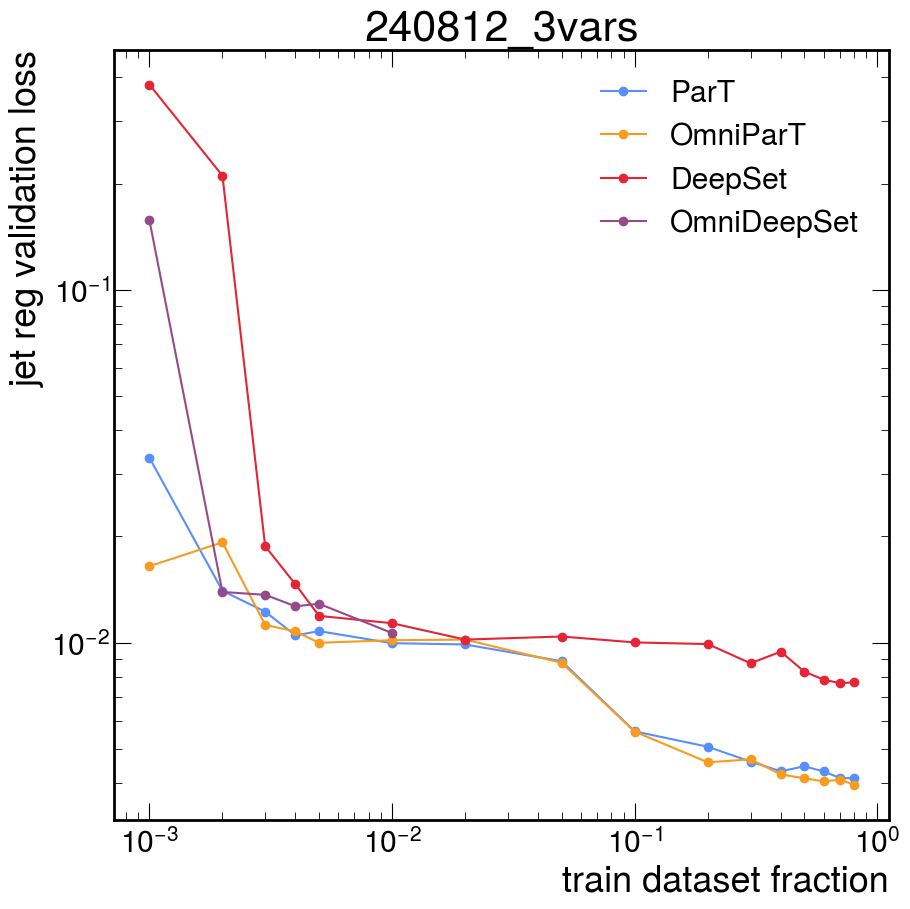

In [11]:
# plt.plot(train_fracs["SimpleDNN"], best_val_losses["SimpleDNN"], marker="o", label="DeepSet")
# plt.plot(train_fracs["LorentzNet"], best_val_losses["LorentzNet"], marker="o", label="LorentzNet")
plt.plot(train_fracs["ParticleTransformer"], best_val_losses["ParticleTransformer"], marker="o", label="ParT")
plt.plot(train_fracs["OmniParT"], best_val_losses["OmniParT"], marker="o", label="OmniParT")
plt.plot(train_fracs["SimpleDNN"], best_val_losses["SimpleDNN"], marker="o", label="DeepSet")
plt.plot(train_fracs["OmniDeepSet"], best_val_losses["OmniDeepSet"], marker="o", label="OmniDeepSet")
# plt.plot(train_fracs["OmniFeedforward"], best_val_losses["OmniFeedforward"], marker="o", label="OmniDeepSet")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc="best")
plt.xlabel("train dataset fraction")
plt.ylabel("jet reg validation loss")
plt.title("240812_3vars")

In [ ]:
ks = sorted(losses["ParticleTransformer"].keys())

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for ax, k in zip(axs.flatten(), ks):
    plt.sca(ax)
    plt.plot(losses["ParticleTransformer"][k]["losses_validation"], label="ParT")
    plt.plot(losses["OmniParT"][k]["losses_validation"], label="OmniParT")
    plt.legend(loc="best", fontsize=10)
    plt.title("frac={}".format(k), fontsize=10)
    plt.yscale("log")
    plt.ylabel("validation loss", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    plt.ylim(10**-4, 10**1)
    plt.xlabel("epoch", fontsize=10)
#plt.tight_layout()